In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 간단한 시계열 데이터 만들기

- 정상시계열(우연 변동 시계열)

In [3]:
dd = np.array([1342, 1442, 1252, 1353, 1425, 1462, 1256, 1273, 1242, 1359, 1412, 1252, 1201, 1467, 1322, 1406, 1234, 1290, 1406, 1208]).reshape(5,4)
dd

array([[1342, 1442, 1252, 1353],
       [1425, 1462, 1256, 1273],
       [1242, 1359, 1412, 1252],
       [1201, 1467, 1322, 1406],
       [1234, 1290, 1406, 1208]])

In [12]:
dd_ts = pd.DataFrame(dd, index = range(2016, 2021), columns = ['Qt1', 'Qt2', 'Qt3','Qt4'])
dd_ts

,Qt1,Qt2,Qt3,Qt4
2016,1342,1442,1252,1353
2017,1425,1462,1256,1273
2018,1242,1359,1412,1252
2019,1201,1467,1322,1406
2020,1234,1290,1406,1208


- 데이터 프레임 dd_ts의 행과 열을 stack 방식으로 변환하고 인덱스 초기화

In [13]:
dd_ts = dd_ts.stack().reset_index()
dd_ts

,level_0,level_1,0
0,2016,Qt1,1342
1,2016,Qt2,1442
2,2016,Qt3,1252
3,2016,Qt4,1353
4,2017,Qt1,1425
5,2017,Qt2,1462
6,2017,Qt3,1256
7,2017,Qt4,1273
8,2018,Qt1,1242
9,2018,Qt2,1359


In [14]:
dd_ts.columns = ['year', 'quarter', 'value']
dd_ts

,year,quarter,value
0,2016,Qt1,1342
1,2016,Qt2,1442
2,2016,Qt3,1252
3,2016,Qt4,1353
4,2017,Qt1,1425
5,2017,Qt2,1462
6,2017,Qt3,1256
7,2017,Qt4,1273
8,2018,Qt1,1242
9,2018,Qt2,1359


In [15]:
dd_ts['year'] = dd_ts['year'].apply(str)

In [16]:
dd_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     20 non-null     object
 1   quarter  20 non-null     object
 2   value    20 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 528.0+ bytes


In [17]:
dd_ts['date'] = dd_ts['year'] + dd_ts['quarter']

In [18]:
dd_ts['date'] = dd_ts['date'].str.replace('t', '')
dd_ts

,year,quarter,value,date
0,2016,Qt1,1342,2016Q1
1,2016,Qt2,1442,2016Q2
2,2016,Qt3,1252,2016Q3
3,2016,Qt4,1353,2016Q4
4,2017,Qt1,1425,2017Q1
5,2017,Qt2,1462,2017Q2
6,2017,Qt3,1256,2017Q3
7,2017,Qt4,1273,2017Q4
8,2018,Qt1,1242,2018Q1
9,2018,Qt2,1359,2018Q2


- date 컬럼을 분기 주기로 변환 후 타임스탬프 형식으로 변경

In [19]:
pd.PeriodIndex(dd_ts['date'], freq = 'Q')

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4',
             '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2',
             '2020Q3', '2020Q4'],
            dtype='period[Q-DEC]', name='date')

In [20]:
pd.PeriodIndex(dd_ts['date'], freq = 'Q').to_timestamp()

DatetimeIndex(['2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01'],
              dtype='datetime64[ns]', name='date', freq='QS-OCT')

In [21]:
dd_ts['date'] = pd.PeriodIndex(dd_ts['date'], freq = 'Q').to_timestamp()

In [22]:
dd_ts

,year,quarter,value,date
0,2016,Qt1,1342,2016-01-01
1,2016,Qt2,1442,2016-04-01
2,2016,Qt3,1252,2016-07-01
3,2016,Qt4,1353,2016-10-01
4,2017,Qt1,1425,2017-01-01
5,2017,Qt2,1462,2017-04-01
6,2017,Qt3,1256,2017-07-01
7,2017,Qt4,1273,2017-10-01
8,2018,Qt1,1242,2018-01-01
9,2018,Qt2,1359,2018-04-01


In [24]:
dd_ts = dd_ts.set_index('date')
dd_ts

,year,quarter,value
date,,,
2016-01-01,2016,Qt1,1342
2016-04-01,2016,Qt2,1442
2016-07-01,2016,Qt3,1252
2016-10-01,2016,Qt4,1353
2017-01-01,2017,Qt1,1425
2017-04-01,2017,Qt2,1462
2017-07-01,2017,Qt3,1256
2017-10-01,2017,Qt4,1273
2018-01-01,2018,Qt1,1242


<Axes: xlabel='date'>

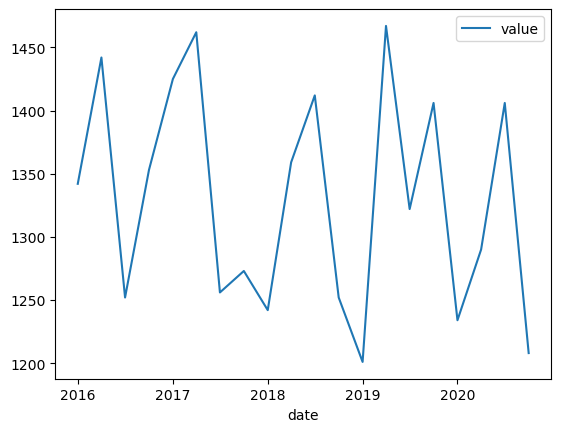

In [26]:
# 시계열 데이터 시각화
sns.lineplot(dd_ts)

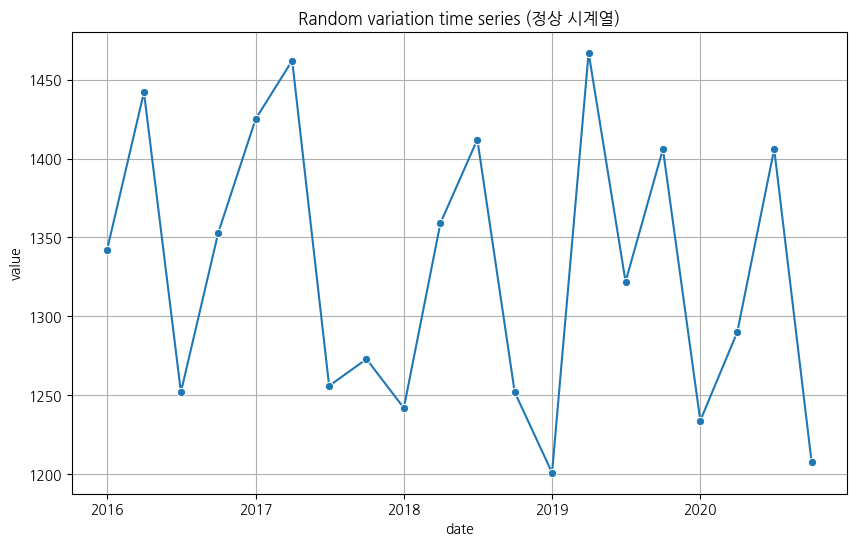

In [29]:
# 시계열 데이터 시각화
plt.figure(figsize = (10, 6))
sns.lineplot(x = dd_ts.index, y = dd_ts['value'], marker = 'o')
plt.title('Random variation time series (정상 시계열)')
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)
plt.show()

- 주기를 타지 않는 제품의 생산량, 판매량 데이터, 짧은 기간의 주가 데이터, 금리 등이 이와 같은 성향을 갖는다.